1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [14]:

from sklearn.datasets import load_breast_cancer

# Load the dataset

data = load_breast_cancer()

X = data.data
y = data.target

# Display dataset information
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Dataset shape:", X.shape)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Dataset shape: (569, 30)


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


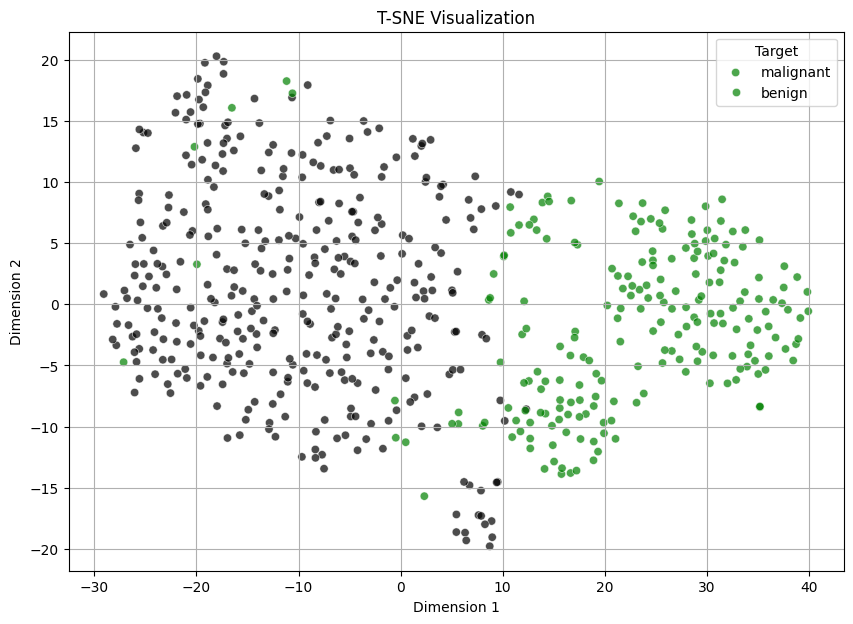

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

target_names = data.target_names

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# T-SNE logic.
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate='auto', init='pca', n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Convert the result into a DataFrame for visualization
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Target'] = y

# Visualization using seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_tsne,
    x='Dimension 1',
    y='Dimension 2',
    hue='Target',
    palette=['green', 'black'],
    alpha=0.7
)
plt.title('T-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Target', labels=target_names)
plt.grid(True)
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [16]:

from sklearn.model_selection import train_test_split

# Split data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display split sizes.
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (455, 30), Test set size: (114, 30)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [19]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ab_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ab_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Function to evaluate and print metrics
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Evaluate each model
evaluate_model(dt_model, "Decision Tree")
evaluate_model(rf_model, "Random Forest")
evaluate_model(ab_model, "AdaBoost")

Results for Decision Tree:
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:
[[40  3]
 [ 3 68]]

Results for Random Forest:
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1 Score: 0.97
Confusion Matrix:
[[40  3]
 [ 1 70]]

Results for AdaBoost:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98
Confusion Matrix:
[[41  2]
 [ 1 70]]



8. Tuning Hyperparameters for each model.

In [22]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and hyperparameter distributions...
models_params = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'param_dist': {
            'max_depth': randint(3, 20),
            'min_samples_split': randint(2, 20),
            'criterion': ['gini', 'entropy']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(3, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10),
            'criterion': ['gini', 'entropy']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'learning_rate': [0.01, 0.1, 0.5, 1, 2]
        }
    }
}

# Function to perform RandomizedSearchCV
def perform_random_search(model_name, model, param_dist):
    print(f"Performing RandomizedSearch for {model_name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=50,  # Number of parameter settings sampled
        cv=5,  # Cross-validation folds
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    print(f"Best Parameters for {model_name}: {random_search.best_params_}")
    print(f"Best Cross-Validated Score for {model_name}: {random_search.best_score_:.2f}")
    # Test set evaluation
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model_name}: {test_accuracy:.2f}\n")
    return best_model, test_accuracy

# Perform RandomizedSearch for each model and track results
results = []
for model_name, model_info in models_params.items():
    best_model, test_accuracy = perform_random_search(model_name, model_info['model'], model_info['param_dist'])
    results.append({'Model': model_name, 'Best_Model': best_model, 'Test_Accuracy': test_accuracy})

# Find the winner
winner = max(results, key=lambda x: x['Test_Accuracy'])
print("\n=== Summary of Results ===")
for result in results:
    print(f"{result['Model']} - Test Accuracy: {result['Test_Accuracy']:.2f}")

print(f"\n🏆 The Winner is: {winner['Model']} with a Test Accuracy of {winner['Test_Accuracy']:.2f} 🏆")
print(f"Best Model Details:\n{winner['Best_Model']}")

Performing RandomizedSearch for DecisionTree...
Best Parameters for DecisionTree: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 12}
Best Cross-Validated Score for DecisionTree: 0.95
Test Accuracy for DecisionTree: 0.96

Performing RandomizedSearch for RandomForest...
Best Parameters for RandomForest: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}
Best Cross-Validated Score for RandomForest: 0.96
Test Accuracy for RandomForest: 0.96

Performing RandomizedSearch for AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 181}
Best Cross-Validated Score for AdaBoost: 0.97
Test Accuracy for AdaBoost: 0.97


=== Summary of Results ===
DecisionTree - Test Accuracy: 0.96
RandomForest - Test Accuracy: 0.96
AdaBoost - Test Accuracy: 0.97

🏆 The Winner is: AdaBoost with a Test Accuracy of 0.97 🏆
Best Model Details:
AdaBoostClassifier(learning_rate=1, n_estimators=181, random_state=42)


In [ ]:

import json

# Function to log experiments
def log_experiment(experiment_id, params, result, file_name="pdf.hyperparams_lamar_atamleh.txt"):
    with open(file_name, "a") as file:
        file.write(f"experiment_id: {experiment_id}, parameters: {json.dumps(params)}, result: {result}\n")

# Example of running experiments with SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Experiment configurations
experiments = [
    {"C": 1, "kernel": "linear"},
    {"C": 10, "kernel": "rbf"},
    {"C": 0.1, "kernel": "poly"},
    {"C": 1, "kernel": "sigmoid"},
    {"C": 100, "kernel": "rbf"}
]

# Running the experiments and logging results
for idx, params in enumerate(experiments):
    model = SVC(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Logging the experiment
    log_experiment(idx + 1, params, accuracy)
